# Asymptotic Analysis and Notation 

Have you found that the explanation for Big-Oh or $\Theta$ notation tends to be more confusing that it should be? If so, you might find this useful. I've prepared these notes to try to cut through to the concepts behind it (which are way simpler than most explanations)... hope I managed to do it successfully and this notes serve someone with the same problems ;)

### 1) Time complexity

These notations are used to evaluate the **time-complexity** of an algorithm, that is how will the time it takes to run the algorithm increases as we increase its input.

For example, say we want to make a simple sandwich and we realise that making that sandwich takes 3 minutes. If we wanted to make 10 sandwiches, then we can assume it would take us 30 minutes. This is called a **linear time complexity**, since the time we need increases proportionally with the increase of the input. 

On the other hand, we can say that we want to make an ice-cube. Say that making an ice-cube takes 10mins inside the fridge. If we have an ice-maker capable of holding 12 ice-cubes (disregarding any thermal inefficiencies), we can say that making 12 ice-cubes will also take 10mins. This is called a **constant time complexity"**, since the time will not increase as we increase the input.

The analysis of time-complexity is essential for choosing algorithms, as it helps us predict which algorithms will be more efficient as we increase the size of the input.

In general, we can consider the following functions ordered in terms of their time complexity:

$$1 < log(n) < \sqrt n < n < nlog(n) < n^2 < n^3 < ... < n! < n^n $$

The following graph hows the relationship between the different functions and how their value increases as the input value (n) goes up:

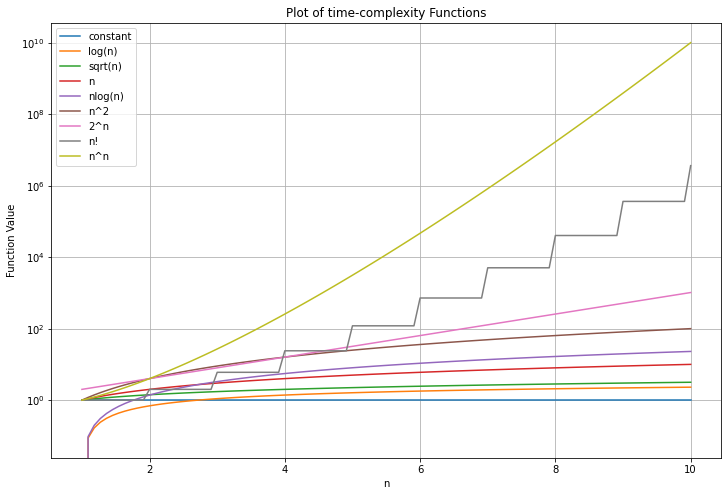

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the range of x values
x_values = np.linspace(1, 10, 100)

# Define the functions
const = [1 for i in x_values]
log_n = np.log(x_values)
sqrt_n = np.sqrt(x_values)
n = x_values
nlog_n = x_values * np.log(x_values)
n_squared = x_values**2
two_n = 2**x_values

# Factorial function (n!)
def factorial_n(n):
    return math.factorial(int(n))

factorial_n = np.vectorize(factorial_n)
n_factorial = factorial_n(x_values)

# Exponential function (n^n)
n_power_n = x_values**x_values

# Plot the functions
plt.figure(figsize=(12, 8))

plt.plot(x_values, const, label='constant')
plt.plot(x_values, log_n, label='log(n)')
plt.plot(x_values, sqrt_n, label='sqrt(n)')
plt.plot(x_values, n, label='n')
plt.plot(x_values, nlog_n, label='nlog(n)')
plt.plot(x_values, n_squared, label='n^2')
plt.plot(x_values, two_n, label='2^n')
plt.plot(x_values, n_factorial, label='n!')
plt.plot(x_values, n_power_n, label='n^n')

plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization

plt.title('Plot of time-complexity Functions')
plt.xlabel('n')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()


Ok, but how do we **analyse code** to assign it one of the functions above and evalaute its time-complexity?

The first step is understanding some structures in the code:
-  **Constant**: This are structures of the code that are executed a number of times that **does not depend on the input size**.
-  **Loops**: These code structures are executed a number of times, but are not recursive. They are a usually **linear function of the input size (n)** (though they can also be quadratic ($n^2$) or more complex functions).
-  **Recursion**: Sections of the code that repeat a number of times that depends on the input size, thus **growing usually in non-linear** ways as the input size increases. 

For example, let's analyse this simple pseudo code to merge 2 ordered lists (we'll see this is a **linear type of problem**):

> **Previously defined Values** \
> X = [sorted lists with (n/2) values] \
> Y = [another sorted lists with (n/2) values] \
> output = [empy array size n] 
>
> **Constant time Section** \
> (First, we initialise the values) \
> i = 0
> j = 0 
>
> **Loop (or proportional) Section** \
> for k = 1 to n: \
> &emsp; if X[i] < Y[j] \
> &emsp; &emsp; Output[k] = X[i] \
> &emsp; &emsp; i++ \
> &emsp; else if X[i] > Y[j] \
> &emsp; &emsp; j++ 

In the example above, notice that we have: 

&emsp; **Constant: 2 instruction** that execute once regardless of the size of n \
&emsp; **Loop: 4 instructions** that execute once for every valur of n

With this, we can say that the code above has a time complexity of:

$$ f(n) = 2 + 4n $$

In [77]:
# This section presents the Python code for the pseudo-code above

# We create 2 ordered lists as inputs
def input_lists_n(n):
    X = [i for i in range(n//2)]
    Y = [j for j in range(n//2, n)]
    return X, Y

X, Y = input_lists_n(n=100)

def merge_ordered_lists(X, Y):

    """ Constant section """
    #initialising values
    Output = []
    n = len(X)  + len(Y)
    i, j = 0, 0

    """ Loop section """
    # this section populates the output list from lists X and Y maintaining an increasing order
    # Notice that this merging algorithm does away with repeated values
    for k in range(n):
        if i < len(X) and j < len(Y):

            if X[i] <= Y[j]:
                Output.append(X[i])
                if X[i] == Y[j]:
                    j += 1
                    i += 1
                else:
                    i += 1
            elif X[i] > Y[j]:
                Output.append(Y[j])
                j += 1
        elif j < len(Y):
            Output.append(Y[j])
            j += 1
        elif i < len(X):
            Output.append(X[i])
            i += 1

    return Output
            
print(merge_ordered_lists(X, Y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


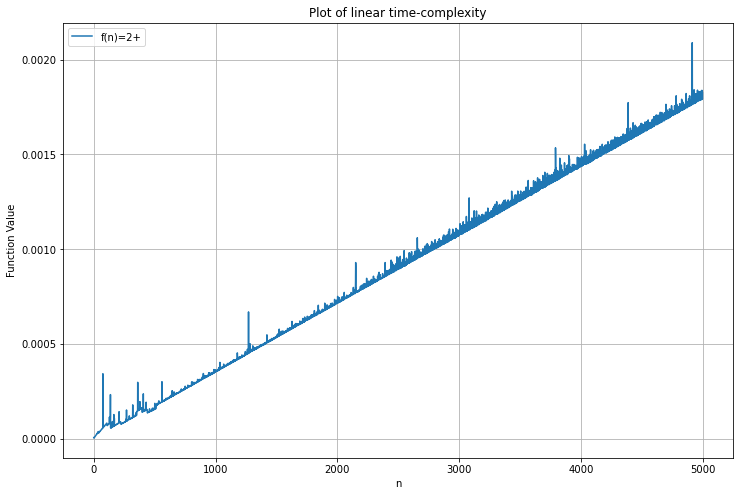

In [81]:
# Plotting the time used to execute the function above as n increases we can see it behaves linearly
import time

x_value=[]
output_time = []

for i in range(5000):
    X, Y = input_lists_n(i)
    
    t_start = time.time()
    merge_ordered_lists(X, Y)
    t_end = time.time()

    x_value.append(i)
    output_time.append(t_end - t_start)

# Plot the functions
plt.figure(figsize=(12, 8))

plt.plot(x_value, output_time, label='f(n)=2+')

plt.title('Plot of linear time-complexity')
plt.xlabel('n')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

Now, let's look at a **recursive problem**. Remember that a recursive problem basically 'calls itself' several times to 'divide' the problem into smaller/simpler ones to solve.

The picture below represents a recursive problem that splits the input data in half for every recursion (a binary search problem). In other words, the first level (level 0) has all the 'n' data in its only node, the next level (level 1) has 2 nodes, each with half the data. 

#### Recursive Tree Figure

<img src="recursive_tree.png">


We can clearly see there's a pattern: for every level '_i_', we have: \
&emsp; - $2^i$ nodes \
&emsp; - $\frac{n}{2^i}$ elements in each node 

This means that we can have **$log_2 (n)$ levels** with a 'n' elements data-set. Or "$log_2 (n) + 1$" to be precise if we include the first node with all the elements, node zero). This is regularly called a recursive problemn with $2^i$ **subproblems**, each with size $\frac{n}{2^i}$, where $i=0,1,2,...,log_2(n)$ is the number of levels.

In the general case, for every recursion we have, the time-complexity will be type **$log_b(n)$**, with b=log_base.

### 2) Big-Oh, $\Theta$ and $\Omega$, what does it all mean??

Asymptotic notations are basically ways to **compare the running time** of different algorithms by concentrating on the **most relevant components** of the running time function.

This notation allows us to discard the effects of architecture, language, and compiling-dependent issues, and concentrate on the structural issues of the algorithms. As stated in the course "Divide and Conquer" by Stanford University's Tim Roughgarden, the key idea of this notation is to **Suppress _constant factors_ and _lower-order terms_**.

Now, disregarding constant components can seem somewhat couterintuitive when we are trying to compare the efficiency of algorithms. After all, $f(n)=2n + 4$ will certainly run faster than $g(n)=25n+5$, right? If we plot the 2 functions, we can clearly see that there is a difference:

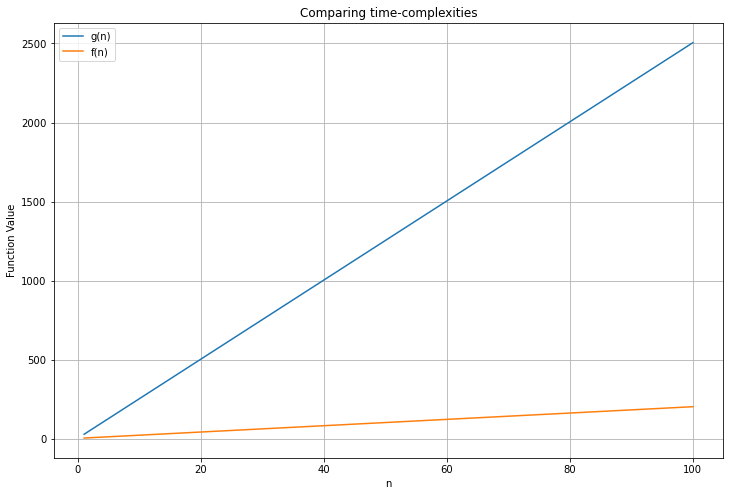

In [3]:
# Define the range of x values
x_values = np.linspace(1, 100, 100)

# Define the functions
f_n = 2*x_values + 4
g_n = 25*x_values + 5

# Plot the functions
plt.figure(figsize=(12, 8))
plt.plot(x_values, g_n, label='g(n)')
plt.plot(x_values, f_n, label='f(n)')

plt.title('Comparing time-complexities')
plt.xlabel('n')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

However, with very large inputs the difference starts to decrease and, since this notation is aimed at comparing the efficiency of algorithms for very large inputs, it's best to just concentrate on the most relevant components (plus, once we select an efficient algorithm, we can still work on the lower-order and constant components to make it even more efficient)

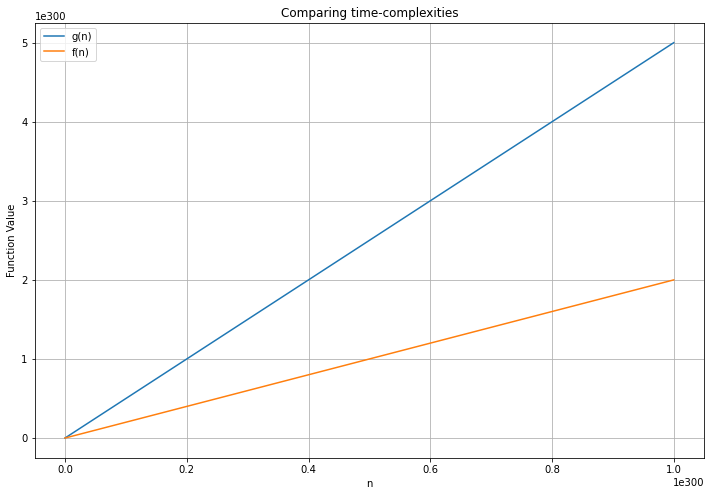

In [39]:
# Define the range of x values
x_values = np.linspace(1, 1e300, 1000)

# Define the functions
f_n = 2*x_values + 4
g_n = 5*x_values + 5

# Plot the functions
plt.figure(figsize=(12, 8))
plt.plot(x_values, g_n, label='g(n)')
plt.plot(x_values, f_n, label='f(n)')

plt.title('Comparing time-complexities')
plt.xlabel('n')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

Now,to understand the concepts of "lower-oder" and "constant" components better, let's look at the function $f(n) = 6n*log_2(n) - 2n^2 + 6n + 5$ with its components plotted here below:

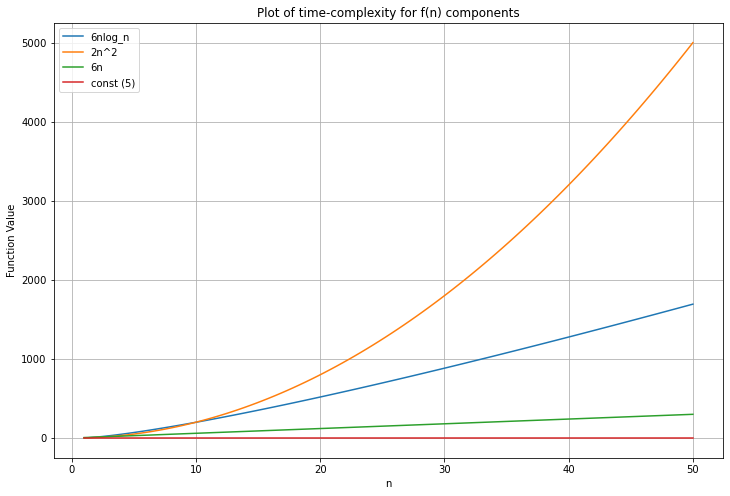

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the range of x values
x_values = np.linspace(1, 50, 100)

# Define the functions
log_n = [6*x*y for (x,y) in zip(x_values, np.log2(x_values))]
n_squared = 2*x_values**2
n_linear = x_values*6
const = [5 for i in x_values]

# Plot the functions
plt.figure(figsize=(12, 8))

plt.plot(x_values, log_n, label='6nlog_n')
plt.plot(x_values, n_squared, label='2n^2')
plt.plot(x_values, n_linear, label='6n')
plt.plot(x_values, const, label='const (5)')

plt.title('Plot of time-complexity for f(n) components')
plt.xlabel('n')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()


As we could have expected, as 'n' increases the lesser components become more irrelevant in defining the time-complexity of the function.

Remembering that the order of complexity is defined as:

$$1 < log(n) < \sqrt n < n < nlog(n) < n^2 < n^3 < ... < n! < n^n $$

We can see that *f(n)*'s time-complexity is mostly defined by its $2n^2$ component. As such, the other components are **"lower-order"**. It is also easy to see that the **constant factor** 2 in $2n^2$ is not truly relevant, so we can reduce the time-complexity of f(n) to its key component $n^2$.

This "key component" is usually named **most significant** or **dominant** term.

Let's see other examples:

>&emsp; 1) $f(n) = 6nlog_2(n) + 6n$ -> Dominant term: nlog(n) \
&emsp; &emsp; &emsp;*(notice that the log base is basically a constant component)* \
>&emsp; 2) $f(n) = 6n + 4$ -> Dominant term: n \
>&emsp; 3) $f(n) = 2^{n+10}$ -> Dominant term: $2^n$, since $2^{10}$ is a constant component.

Now, let's delve into the **3 types of notations** that are commonly used to represent the time-complexity of a function:

> &emsp; - **Big-Oh**: that defines an **upper boundary** (limit) for the complexity-time of the function. \
> &emsp; - **Omega ($\Omega$)**: that defines a **lower boundary** (limit) for the complexity-time of the function. \
> &emsp; - **Theta ($\Theta$)**: that defines a **band range or lower and upper boundary** (limit) for the complexity-time of the function.

I'll define here each of these notations. It is important to see that the notation can become somewhat confusing (at least it did for me) as we'll see:

#### Big-Oh

Big-Og is formally defined as: 

<h3>&emsp; $T(n) = O(f(n))$ , &emsp; if and only if, $T(n) <= cf(n)$, for all $n >= n_0$</h3>

There are 2 important things to consider in this notation:

&emsp; &emsp; 1) T(n) = O(f(n)) **does not represent a mathematic equality**, it's simply a notation stating a relationship between T(n) and f(n). \
&emsp; &emsp; 2) the values c and $n_0$ do not depend on n.

Considering this, the Big-Oh notation **O()** defines f(n) as an **upper boundary** for F(n). This means that, for large enough values of '*n*' (that is, for n >= $n_0$), there exists a function f(n) which values are always greater than T(n) then multiplied by a constant 'c'.

Going back to our previous examples, we can say that:
> &emsp; &emsp; For $T(n) = 6nlog_2(n) + 6n$, we can say that T(n) = O(nlog(n)). \
> &emsp; &emsp; Also, for $T(n) = 6n + 4$, we can say that T(n) = O(n).

Now, we can also realise that there's more than one f(n) that complies with the definition. That is, Big-Oh defines an upper bound, but not a unique one. For example:

For $T(n) = 6n$ we can say:
> &emsp; T(n) = O(n) \
> &emsp; T(n) = O(nlog(n)) (as n < nlogn) \
> &emsp; T(n) = $O(n^2)$, and so on for any complexity larger than 'n'...

#### Omega ( $\Omega$ )

Similarly to the Big-Oh notation, the Omega notation bounds a function, but this time **$\Omega$ defines a lower boundary**.

Formaly, we say: 

<h3>&emsp; $T(n) = \Omega(f(n))$ , &emsp; if and only if, $T(n) => cf(n)$, for all $n >= n_0$</h3>

Using the same examples above, we have: 
> &emsp; &emsp; For $T(n) = 6nlog_2(n) + 6n$, we can say that T(n) = $\Omega(n)$. \
> &emsp; &emsp; Also, for $T(n) = 6n + 4$, we can say that T(n) = $\Omega(\sqrt n)$.

Just like with the Big-Oh notation, $\Omega$ does not define a unique lower boundary, so we can also say that: 

For a $T(n) = 3n^3$:
> &emsp; T(n) = $\Omega(n^2)$ \
> &emsp; T(n) = $\Omega(nlog(n))$ (as nlogn < $n^2$) \
> &emsp; T(n) = $\Omega(n)$, and so on for any complexity lower than $n^3$

#### Theta ($\Theta$)

Finally we have $\Theta$ which combines the previous 2 to define a lower and upper boundary for a function. In very layman's terms, we could say that $\Theta$ notation works with the '*intersection*' of the range for Big-Oh and $\Omega$ notations.

Let's take the function f(n) = 3n + 5. As we've seen before, we know that the dominang component is 'n', so the following image shows tha valid Big-Oh, $\Omega$ and $\Theta$ notatios:
<img src="asymptotic_notations.png">
>*(notice how this also exemplifies how asymptotic notations basically define that a function 'belongs to a class' or series of functions)*


Formaly, we say: 

<h3>&emsp; $T(n) = \Theta(f(n))$ , &emsp; if and only if, $ c_1f(n) <= T(n) <= c_2f(n)$, for all $n >= n_0$</h3>

It's clear to see that $\Theta$ gives us much more information than Big-Oh and $\Omega$ notations. 

<h4> It's very important to note that it's common practice between practitioners to use Big-Oh when they are actually referring to $\Theta$ bounding, since they use the smalles bound in the Big-Oh possible notations (which, as we've seen, is usually equivalent to the $\Theta$ bound).</h4>


#### Exercises

Let's check our understanding: Say we have $T(n) = \frac{1}{2}n^2 + 3n$, which of the following statements is wrong?

>  &emsp; a) $T(n) = O(n)$ \
>  &emsp; b) $T(n) = \Omega(n)$ \
>  &emsp; c) $T(n) = \Theta(n^2)$ \
>  &emsp; d) $T(n) = O(n^3)$ 

&emsp; We know that T(n) can be reduced to its dominant component $n^2$, so:

>  &emsp; a) is wrong, since Big-Oh represents an upper boundary and n < $n^2$ \
>  &emsp; b) is right, since $\Omega$ represents a lower boundary and n < $n^2$ \
>  &emsp; c) is right, since $\Theta$ represents a lower and upper boundary and $n^2$ is the dominant component \
>  &emsp; d) is right, since Big-Oh represents an upper boundary and $n^2 < n^3$


### 3) The "Master Method"

Though it seems like a concept take from a Guillermo del Toro Movie, the **Master Method** is a mathematical framework used to detemine the **time-complexity of recursive algorithms**. 

The Master Method considers a recursive algorithm that divides a problem of size *n* into *a* subproblems, each of size *$\frac{n}{b}$* (evidently, this means that each recursive call reduces the size of the subproblem by 'b'). The division and combination steps are assumed to take $O(n^d)$ time-complexity, so the algorithm takes the following form:

<h3>If $T(n) <= aT(\frac{n}{b}) + O(n^d)$</h3>

then, T(n) takes one of the following forms depending on the values of *a*, *b*, and *d*: 
> <h4>Case 1: if a = $b^d$, then T(n) = O($n^d$log(n))</h4>
> <h4>Case 2: if a < $b^d$, then T(n) = O($n^d$)</h4>
> <h4>Case 3: if a > $b^d$, then T(n) = O($n^{log_ba}$)</h4>

To understand the previous formulation it helps to consider:

- $T(\frac{n}{b})$ represents a recursive call in the algorithm that reduces the size of the problem by _"b"_  in every recursive call. For example, if b=2, then the problem is reduced by half with every recursion (as the binary search problem we say earlier when we reviewed what are recursions).
- *_"a"_* represents the **number of subproblems** that are spawned from a single recursion. Notice that '$a^j$' represents the number of sub-problems we have at level 'j'. So, in a way, the balance between 'a' and '$b^d$' defines how the complexity behaves as the input size increases.
- $O(n^d)$ represents the complexity of the non-recursive parts of the algorithm.
    
There is also a (more general) definition of the Master Method that uses f(n) instead of $O(n^d)$. That definition also uses different Cases, but ultimately delivers the same results.

Let us take the binary search problem represented in the tree-like figure above (right before the begining of point 2) to show how the Master Method works.

To begin, we have:

- a = 1. Though we do separate the problem in 2 with each recursion, we only use 1 half (since the we know that the other half does not contain the element we are looking for). This is why a=1 instead of 2, even though we are dividing the problem into 2 with each recursion.
- b = 2, since we have a binary search that reduces the problem by half with every recursion.
- d = 0, since the non-recursive part of the problem will have at most a constant complexity.

Thus, asserting that a = 1 = $b^d= 2^0$ = 1, we have a Case 1 type of Master Method, so the time-complexity is:

$ T(n) = O(n^dlog(n)) = O(n^0log(n))$, that is $T(n) = O(log(n)) $, just as we saw previously.

It's important to consider that if an algorithm has multiple recursive calls (each with its own 'a', 'b', and 'd'), then we should consider only the one with the largest 'a' and the smalles 'b' values to use in the Master Method formula.
    
##### Further understanding the Master Method
    
We will review here what each section of the Master Method means. To make things easier, I'll assume that 'n' is a power of 'b', so $\frac{n}{b}$ has only integer values.
    
Another concept I'll use here is the assumption that $cn^d = O(n^d)$. It's easy to see that there's no stretch of interpretation here since this is not part of the recursion and we can always define a value large enough for 'd' so this concept holds.
    
Now, if we go back to the "Recursive tree figure" above, we can recall that if we have a problem with **'n' elements** (size 'n') and we try to solve if recursively, for every level **'j'** in the tree, we'll have:

$a^j$ subproblems, each of which will have a size of $n/b^j$.

Where '**a**' is the number of subproblems that are created after every recursion and '**b**' is the rate at which the size of the problem is reduced. 

With this, we can state that the amount of work at every level of the tree is at most:

&emsp; &emsp; **Amount of work <= (number of subproblems) * (size of subproblems)$^d$**
    
In other words, we have:

$$ Amount\_of\_work(level\ j) <= a^j * c * (\frac{n}{b^j})^d$$

(Remember that we defined $cn^d$ as the work for the non-recursive section of the problem.)
    
    
Since we know that the size of the problem is reduced by '**b**' in every recursion, we must have at $j_{max} = log_b(n)$, that is, the values for j are j=0,1,2,...,$log_b(n)$. So now we can define the total work in the complete tree as:

$$ Amount\_of\_total\_work <= \sum_{j=0}^{log_b(n)}a^j * c * (\frac{n}{b^j})^d = cn^d\sum_{j=0}^{log_b(n)}[\frac{a}{b^d}]^j$$
    
    
The previous equation clearly shows how the rate at which the number of problems grows (a) relates to the rate at which the number of elements in each problem is reduced ($\frac{1}{b^d}$) with each iteration.

So we can interpret the 3 cases in the Master Method as:

- Case 1: a = $b^d$ --> the amount of work is constant, it does not grow nor decreases with recursive iterations.

- Case 2: a < $b^d$ --> the amount of work decreases with every iteration, since the number of new problems is lower than the size of these new problems.

- Case 3: a > $b^d$ --> the amount of work increases with every iteration, since the number of new problems grows faster that how the size of those problems decrease.


Now, if we take the equation above and apply to them each of the 3 cases, it's easy to see that:

- Case 1: a = $b^d$ --> $Total\_work <= cn^d \sum_{j=0}^{log_bn}(1)^j = cn^d(log_b(n)+1)$ \
Which in asymptotic notation (discarding constant and lower-order factors -notice that the base of the log is a constant factor) is **$O(n^dlogn)$**
    
    
- Case 2: a < $b^d$ --> here the work is being reduced with every iteration, so the most work is done at the root of the tree, i.e: when 'j=0'. Thus: $Total\_work <= cn^d $. Which in asymptotic notation is $O(n^d)$
    
    
- Case 3: a > $b^d$ --> here the work is increasing with each iteration, so the most work is done at the leaves, that is: $Total\_work <= ca^{log_bn}$, Which in asymptotic notation is $O(n^{log_ba})$, as we can see in the demonstration box below.


<div class="alert alert-block alert-success">  
    
In this section we'll show Cases 2 and 3 of the Master Method in more detail. First, we need to remember **geometric series** and recall that for r!=1:
    
&emsp; $1+r+r^2+r^3+...+r^k = \frac{r^{k+1}-1}{r-1}$\
    \
Now, let's review **Case 2** where a<$b^d$ or, equivalently $\frac{a}{b^d}<1$. Using the geometric series above, and $\frac{a}{b^d}=r$ and $k=log_bn$ to simplify the notation, we can easily show that:


&emsp; $1+r+r^2+r^3+...+r^k = \frac{r^{k+1}-1}{r-1} <= \frac{1}{1-r}$\
\
This means that the series is smaller than a constant, that is: 
$$Total\_work = cn^d\sum_{j=0}^{log_b(n)}[\frac{a}{b^d}]^j = cn^d*\{some\_constant\} -> O(n^d)$$
    
\
For **Case 3** we have $\frac{a}{b^d}>1$. Again, using the geometric series, and $\frac{a}{b^d}=r$ and $k=log_bn$, we can also show that:
                                       
&emsp; $1+r+r^2+r^3+...+r^k = \frac{r^{k+1}-1}{r-1} <= r^k(1+\frac{1}{r-1})$
                                       
So we have: \
$$Total\_work = cn^d * (\frac{a}{b^d})^{log_bn} * (some\ constant)= cn^da^{log_bn} (b^{log_bn})^{-d}=cn^da^{log_bn}n^{-d} = ca^{log_bn}$$
                              
\
Now, if we recall that $logx^y = ylogx$, we can see that, if we apply $log_b$ to 'a', we have:

&emsp; $log_b(a^{log_bn}) = log_b(n) * log_b(a)$, which can also be written as $log_b(n^{log_b(a)})$                  
                                         
\
So we clearly have that $a^{log_b(n)} = n^{log_b(a)}$, with the latter being a computationaly simpler way to implement, which is why that's the version conventionally used in the Master Method.
                                           
</div>
    
<div class="alert alert-block alert-success">  
Let's use this additional section to recall and demonstrate the property of geometric series used above. We will use induction to demonstrate:

\
Remember that for r!=1, we have: 
&emsp; $1+r+r^2+r^3+...+r^k = \frac{r^{k+1}-1}{r-1}$\
\
Now, for the initial case, k=1, we have:
$$ (1+r) = \frac{r^{1+1}-1}{r-1}=\frac{(r-1)(r+1)}{r-1}=(r+1)$$\
\
Now, we assume that the equation holds for k=k and demonstrate for k=k+1:
$$ (1+r+r^2+r^3+...+r^{k-1}+r^k+r^{k+1}) = \frac{r^{k+1+1}-1}{r-1}$$\
\
We know that (r-1)!=0, since r!=1, so we can safely multiply both sides by (r-1) and see that the first section on the left side is (r^{k+1}-1), since we assume the equation is true for k=k:


$$ (r-1)(1+r+r^2+r^3+...+r^{k-1}+r^k) + (r-1)r^{k+1}) = (r^{k+2}-1)$$
                                         
So we have:
$$ r^{k+1}-1 + (r-1)r^{k+1} = r^{k+2}-1$$
From which is easy to show that:
$$ r^{k+1}-1 + r^{k+2} - r^{k+1} = r^{k+2}-1$$
</div>